In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [268]:
withRL = pd.read_csv("")
withRL = pd.read_csv("",sep=';')
withRL = withRL.iloc[:,[-3,-4]]


IndexError: positional indexers are out-of-bounds

In [237]:
withRL['SD'] = 0


In [238]:
withRL.head()

,interval_nVehSeen,interval_nVehLeft,SD
0,5,0,0
1,4,3,0
2,2,2,0
3,5,1,0
4,5,4,0


In [239]:
 for i in range(int(len(withRL.loc[:,"interval_nVehSeen"])/12)):
    temp = withRL['interval_nVehSeen'][i*12:(i*12)+12]
    withRL['SD'][i]=np.std(temp)
#     /np.mean(temp)
    

In [240]:
withRL['leftPercentage'] = 0

In [241]:
 for j in range(int(len(withRL.loc[:,"interval_nVehSeen"])/12)):
    seen = np.sum(withRL['interval_nVehSeen'][j*12:(j*12)+12])
    left = np.sum(withRL['interval_nVehLeft'][j*12:(j*12)+12])
    withRL['leftPercentage'][j]=left/seen


C:\Users\sunny\AppData\Local\Temp\ipykernel_9648\3616633080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withRL['leftPercentage'][j]=left/seen


In [242]:
withRL= withRL.iloc[:int(len(withRL.loc[:,"leftPercentage"])/12),[-1,-2]]

In [243]:
for j in range(int(len(withRL.loc[:,"leftPercentage"])/12)):
    withRL['leftPercentage'][j]=(left/seen)


In [244]:
tempSD=withRL["SD"]
withRL["SD"] = tempSD[1:]
withRL = withRL.loc[1:,:]
withRL

,leftPercentage,SD
1,0.477273,2.947457
2,0.477273,3.894440
3,0.477273,3.118048
4,0.477273,3.243583
5,0.477273,2.823512
...,...,...
1246,0.520000,3.064129
1247,0.541667,3.341656
1248,0.543478,3.566822
1249,0.505882,3.817904


In [245]:
withRL = withRL.groupby(by="SD",level = None).mean().reset_index()
print(withRL.head())

         SD  leftPercentage
0  1.699673        0.454545
1  1.748015        0.510000
2  1.753964        0.525773
3  1.785357        0.525253
4  1.795055        0.510870


Text(0, 0.5, 'leftPercentage')

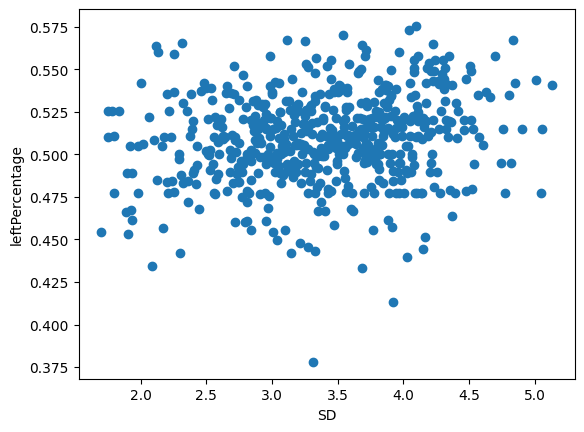

In [246]:
plt.scatter(withRL['SD'],withRL['leftPercentage'])
plt.xlabel('SD')
plt.ylabel('leftPercentage')

In [247]:
withoutRL = pd.read_csv("./log-output-no-rl-1668660110.735033.csv",sep=';')

In [248]:
withoutRL['SD'] = 0


In [249]:
withoutRL.head()

,interval_begin,interval_end,interval_haltingDurationSum,interval_id,interval_intervalHaltingDurationSum,interval_jamLengthInMetersSum,interval_jamLengthInVehiclesSum,interval_maxHaltingDuration,interval_maxIntervalHaltingDuration,interval_maxJamLengthInMeters,...,interval_meanOccupancy,interval_meanSpeed,interval_meanTimeLoss,interval_meanVehicleNumber,interval_nVehEntered,interval_nVehLeft,interval_nVehSeen,interval_sampledSeconds,interval_startedHalts,SD
0,0.0,40.0,0.0,id_E0_0,0.0,0.0,0,0.0,0.0,0.0,...,0.79,12.68,1.77,2.20,5,0,5,88.0,0.0,0
1,0.0,40.0,0.0,id_E0_1,0.0,0.0,0,0.0,0.0,0.0,...,0.35,10.99,1.75,0.97,4,3,4,39.0,0.0,0
2,0.0,40.0,0.0,id_E0_2,0.0,0.0,0,0.0,0.0,0.0,...,0.20,9.96,3.05,0.55,2,2,2,22.0,0.0,0
3,0.0,40.0,0.0,id_-E1_0,0.0,0.0,0,0.0,0.0,0.0,...,1.02,11.97,2.05,2.23,5,1,5,89.0,0.0,0
4,0.0,40.0,0.0,id_-E1_1,0.0,0.0,0,0.0,0.0,0.0,...,0.52,11.70,1.30,1.12,5,4,5,45.0,0.0,0


In [250]:
 for i in range(int(len(withoutRL.loc[:,"interval_nVehSeen"])/12)):
    temp = withoutRL['interval_nVehSeen'][i*12:(i*12)+12]
    withoutRL['SD'][i]=np.std(temp)
#     /np.mean(temp)
    

C:\Users\sunny\AppData\Local\Temp\ipykernel_9648\4242772586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withoutRL['SD'][i]=np.std(temp)


In [251]:
withoutRL['leftPercentage'] = 0

In [252]:
 for j in range(int(len(withoutRL.loc[:,"interval_nVehSeen"])/12)):
    seen = np.sum(withoutRL['interval_nVehSeen'][j*12:(j*12)+12])
    left = np.sum(withoutRL['interval_nVehLeft'][j*12:(j*12)+12])
    withoutRL['leftPercentage'][j]=(left/seen)


C:\Users\sunny\AppData\Local\Temp\ipykernel_9648\3186921145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withoutRL['leftPercentage'][j]=(left/seen)


In [253]:
withoutRL= withoutRL.iloc[:int(len(withoutRL.loc[:,"leftPercentage"])/12),[-1,-2]]

In [254]:
for j in range(int(len(withoutRL.loc[:,"leftPercentage"])/12)):
    withoutRL['leftPercentage'][j]=left/seen


In [255]:
tempSD=withoutRL["SD"]
withoutRL["SD"] = tempSD[1:]
withoutRL = withoutRL.loc[1:,:]
withoutRL

,leftPercentage,SD
1,0.523256,2.947457
2,0.523256,3.729574
3,0.523256,3.344772
4,0.523256,3.344772
5,0.523256,2.861381
...,...,...
1245,0.468750,3.391165
1246,0.524272,2.956866
1247,0.544554,3.328121
1248,0.538462,3.751851


In [261]:
withoutRL = withoutRL.groupby(by="SD",level = None).mean().reset_index()
print(withoutRL)

           SD  leftPercentage
0    1.433721        0.465909
1    1.462494        0.510204
2    1.552328        0.547368
3    1.689428        0.494949
4    1.831438        0.552381
..        ...             ...
580  4.751462        0.523256
581  4.752192        0.549020
582  4.873397        0.558824
583  4.918079        0.585859
584  5.280993        0.557692

[585 rows x 2 columns]


Text(0, 0.5, 'leftPercentage')

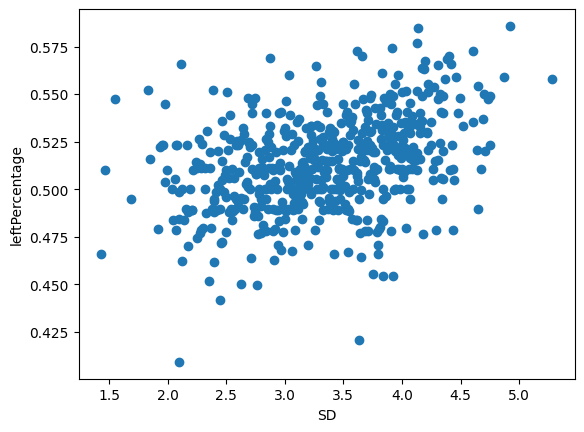

In [262]:
plt.scatter(withoutRL['SD'],withoutRL['leftPercentage'])
plt.xlabel('SD')
plt.ylabel('leftPercentage')

In [263]:
mwithRL,bwithRL = np.polyfit(withRL['SD'],withRL['leftPercentage'],1)
mwithoutRL,bwithoutRL = np.polyfit(withoutRL['SD'],withoutRL['leftPercentage'],1)

Ploting all the necessary graph to compare

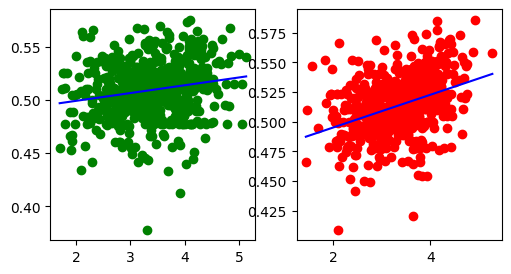

In [264]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(withRL['SD'],withRL['leftPercentage'],color="g")
plt.plot(withRL['SD'],mwithRL*withRL["SD"]+bwithRL,color="b")
plt.subplot(132)
plt.scatter(withoutRL['SD'],withoutRL['leftPercentage'],color="r")
plt.plot(withoutRL['SD'],mwithoutRL*withoutRL["SD"]+bwithoutRL,color="b")



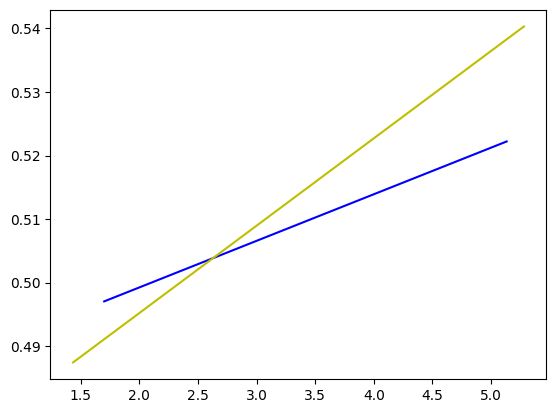

In [265]:
plt.plot(withRL['SD'],mwithRL*withRL["SD"]+bwithRL,color="b")
plt.plot(withoutRL['SD'],mwithoutRL*withoutRL["SD"]+bwithoutRL,color="y")
